In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
houses= pd.read_csv('../datasets/Housing.csv')
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [81]:
houses.isna().sum() 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [82]:
y_train= houses['price']
x_train= houses['area']

In [83]:
def cost_function(x_train, y_train, W, b):
    m= len(x_train)
    return 1/(2*m) * np.sum((W*x_train + b - y_train)**2)

In [84]:
def gradient_descent(x_train, y_train, W_in, b_in, alpha, epochs):
    
    m= len(x_train)
    W=W_in
    b=b_in
    cost_history= []
    param_history= []
    
    for i in range(epochs):
        #recording costs for visualization 
        if i%5==0:
            J= cost_function(x_train, y_train, W, b)
            cost_history.append(J)
            param_history.append([W, b])
        
        dJ_dW= (1/m) * np.sum(x_train* (W*x_train + b - y_train))
        dJ_db= (1/m) * np.sum(W*x_train + b - y_train)

        W-= alpha*dJ_dW
        b-= alpha*dJ_db
    
    return W, b, np.array(cost_history), np.array(param_history)

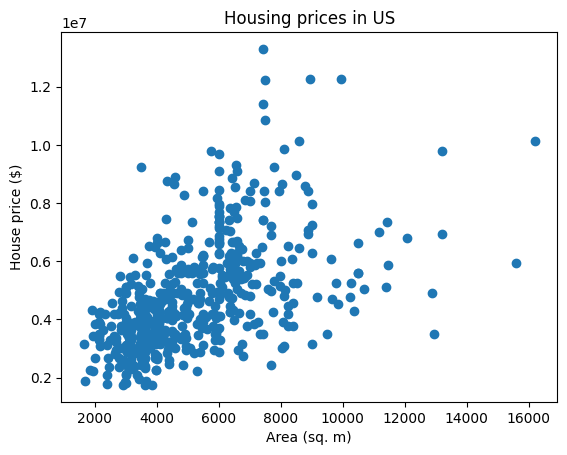

In [ ]:
plt.scatter(x= x_train, y= y_train)
plt.xlabel('Area (sq. m)')
plt.ylabel('House price ($)')
plt.title('Housing prices in US')
plt.show()

In [86]:
def norm(arr):
    norm_arr= (arr- np.mean(arr)) / np.std(arr)
    return norm_arr

In [ ]:
# # result
# x_train= norm(x_train)
# y_train= norm(y_train)

w, b, cost_hist, param_hist = gradient_descent(x_train, y_train, 0, 0, 1e-8, 1000)

w_range = np.linspace(param_hist[:, 0].min() - 1, param_hist[:, 0].max() + 1, 50)
b_range = np.linspace(param_hist[:, 1].min() - 1, param_hist[:, 1].max() + 1, 50)
W, B = np.meshgrid(w_range, b_range)
J= np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j]= cost_function(x_train, y_train, W[i,j], B[i, j])



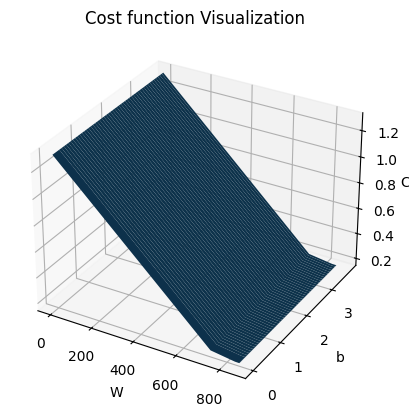

In [88]:
#plotting 3d plot
axs= plt.axes(projection= '3d')
axs.plot_surface(W, B, J)
axs.set_xlabel('W')
axs.set_ylabel('b')
axs.set_zlabel('Cost')
axs.set_title('Cost function Visualization')
plt.show()